<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/work_from_here/intradayplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 4.1 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/mplfinance/plotting.py:694: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


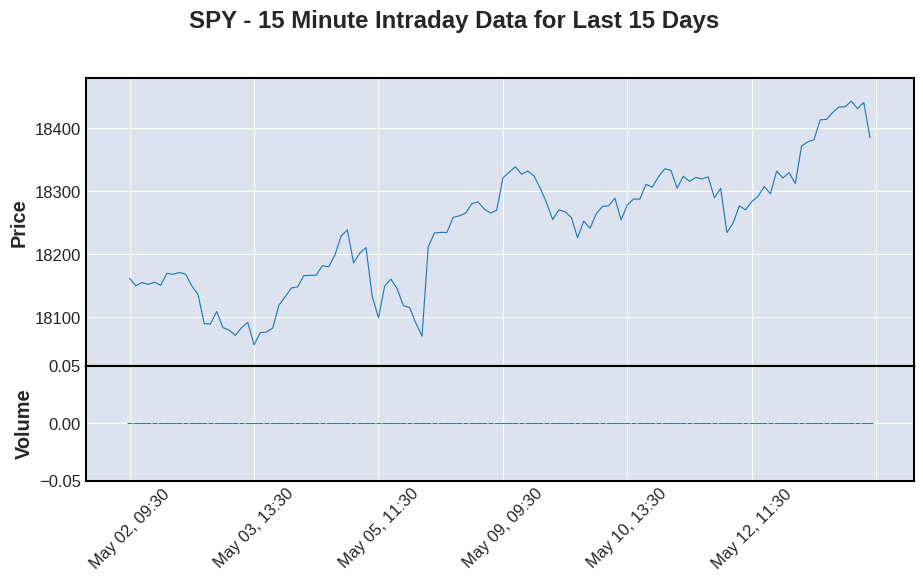

In [9]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

# Download the data
df= yf.download(tickers='^nsei', period='1mo', interval='30m')
rapida = 18*1.2
lenta = 26*1.2
stdv =1.8
df['fast'] =df['Close'].ewm(span=rapida).mean()
df['slow'] =df['Close'].ewm(span=lenta).mean()
df['bband']= df['fast']-df['slow']
df['avg'] = df['bband'].rolling(window=10).mean()
df['Sdev'] = df['bband'].rolling(window=12).std()
df['Upper Band'] = df['avg'] + (df['Sdev'] *stdv)
df['Lower Band'] = df['avg'] - (df['Sdev'] *stdv)
df['spread'] = df['bband'] - df['Lower Band']
df['spread_1'] = -(df['bband'] - df['Upper Band'])
# Check if data is empty (stock market is closed, ticker symbol is incorrect, etc.)
if df.empty:
    print("No data was downloaded. Check if the ticker symbol is correct or if the stock market is open.")
else:
    # Filter for the last 15 days
    data = df.last('15D')

    # Remove weekends
    data = data[data.index.dayofweek < 5]

    # Create the plot
    mpf.plot(data, type='line', volume=True, title='SPY - 15 Minute Intraday Data for Last 15 Days', figratio=(16,8))


In [10]:
import matplotlib.pyplot as plt

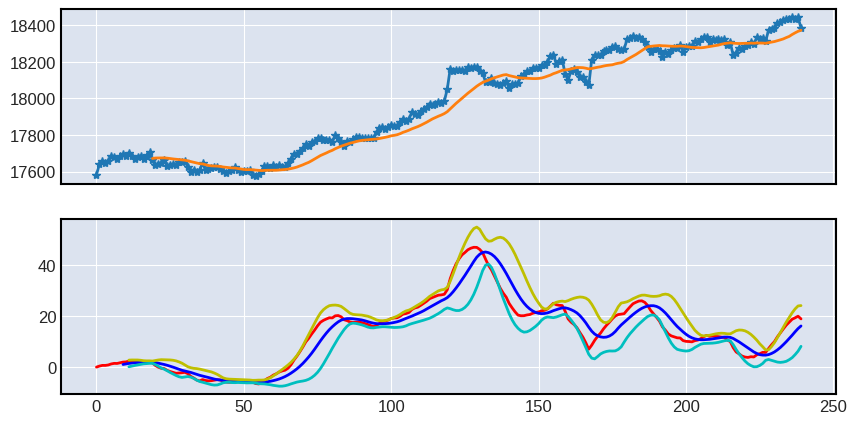

In [11]:
df.reset_index(inplace=True)
fig, ax = plt.subplots(2,1, figsize=(10,5),sharex=True)
ax[0].plot(df.loc[:, 'Close'],'*-')
ax[0].plot(df.loc[:, 'Close'].rolling(window=20).mean())
ax[1].plot(df[['bband']][:],color='r')
ax[1].plot(df[['avg',]][:],color='b')
ax[1].plot(df[['Upper Band',]][:],color='y')
ax[1].plot(df[['Lower Band']][:],color='c')
plt.show()
     